
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [34]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [35]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        X = np.asarray(X)
        self.mean_ = np.mean(X,axis =0)
        self.scale_ = np.std(X,axis=0)
        self.scale_[self.scale_ == 0] = 1
        return self
    
    def transform(self, X):
        X = np.asarray(X)
        return (X-self.mean_)/self.scale_
    
    def inverse_transform(self,X):
        X = np.asarray(X)
        return X*self.scale_ + self.mean_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)


In [36]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=1.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.loss = None
        self.b = None

    def fit(self, X, y):
        n,d = X.shape
        self.w = np.zeros(d)
        loss = []
        self.b = 0.0
        for _ in range(self.epochs):
            y_hat = X@self.w + self.b 
            error = y_hat-y
            loss.append(np.mean(error**2)+ self.l2_lambda * np.sum(self.w**2))#Loss function per iteration(I changed l2_lambda fro 0 to 1)

            dw = (2/n)*(X.T@error) + 2*self.l2_lambda*self.w  # Batch Gradient descent + L2-regularisation
            db = (2/n)*np.sum(error)

            self.w -= self.lr*dw #Updating the parameters of the function
            self.b -= self.lr*db
        return loss
        

    def predict(self, X):
        return X@self.w + self.b


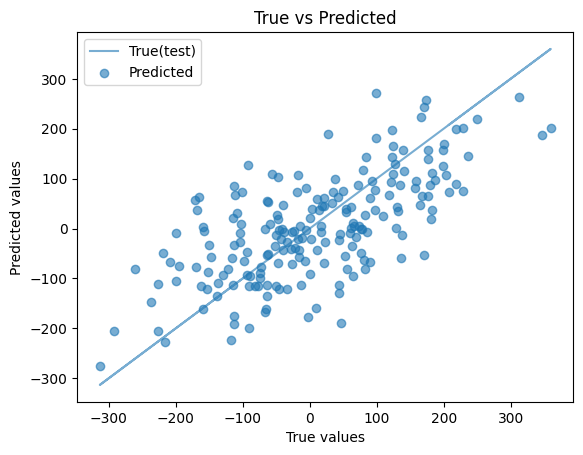

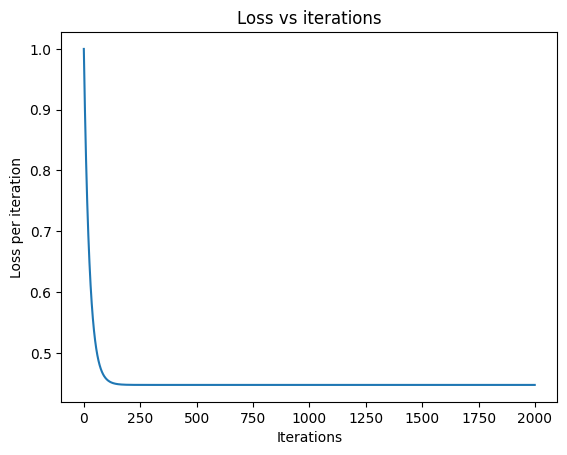

In [ ]:
X, y = make_regression(n_samples=1000, n_features=3, noise=100)#Just using sklearn to get raw data,nothin else :)

#Using 80% of data for training and other 20% for testing
X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

X_scalar = StandardScalerManual()
y_scalar = StandardScalerManual()

X_train_std = X_scalar.fit_transform(X_train)
X_test_std = X_scalar.transform(X_test)# I am not fitting the test data since it will leak the test data and make the model redundant

y_train_std = y_scalar.fit_transform(y_train.reshape(-1,1)).ravel()

model = LinearRegressionManual(lr=0.01,epochs=2000,l2_lambda=0.0)

loss = model.fit(X_train_std,y_train_std)

y_pred_std = model.predict(X_test_std)

y_pred = y_scalar.inverse_transform(y_pred_std.reshape(-1, 1)).ravel()

plt.plot(y_test, y_test,label = "True(test)", alpha=0.6)
plt.scatter(y_test, y_pred,label = "Predicted", alpha=0.6)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.legend()
plt.title("True vs Predicted")
plt.show()

plt.plot(range(len(loss)),loss)
plt.xlabel("Iterations")
plt.ylabel("Loss per iteration")
plt.title("Loss vs iterations")
plt.show()




## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [39]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=1.0):#I changed l2_lamba from 0 to 1 since the data i am working with has high variance
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None

    def fit(self, X, y):
        n,d  = X.shape
        self.w = np.zeros(d)
        losses = []
        self.b = 0.0

        for _ in range(self.epochs):
            z = X@self.w + self.b
            u = sigmoid(z)
            error = u-y
            loss = -np.mean(y*np.log(u+ 1e-15) + (1-y)*np.log((1-u)+ 1e-15)) + self.l2_lambda*(self.w**2) # I am adding 1e-15 so that just in case u becomes 0, the log doesn't explode 
            losses.append(loss)

            dw = (1/n)*X.T@(error) + 2*self.l2_lambda*self.w #Gradient descent + L2-regularisation
            db = (1/n)*np.sum(error)

            self.w -= self.lr*dw 
            self.b -= self.lr*db
        
        return losses
                    

    def predict_proba(self, X):
        return sigmoid(X@self.w + self.b)

    def predict(self, X):
        return (sigmoid(X@self.w + self.b)>0.5).astype(int)

Final Accuracy =  0.8625


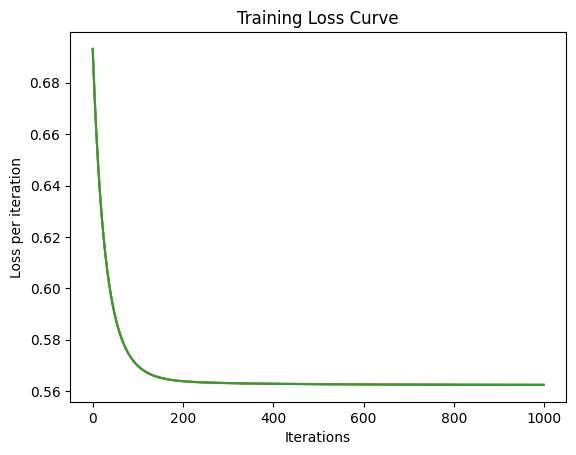

In [ ]:
np.random.seed(1)

n = 400
#Generating random data
x1 = np.random.randn(n)
x2 = x1 + 0.01*np.random.randn(n) 
x3 = x1 + 0.02*np.random.randn(n)

X_log = np.column_stack([x1,x2,x3])

true_w = np.array([3.0,3.0,3.0])
l = X_log@true_w

probs = sigmoid(l)

y_log = (probs>0.5).astype(int)
#Train Test split
X_log_train = X_log[:320]
X_log_test =  X_log[320:]
y_log_train = y_log[:320]
y_log_test = y_log[320:]

X_log_Scalar = StandardScalerManual()#Using standard scaler

X_log_train_std = X_log_Scalar.fit_transform(X_log_train)
X_log_test_std = X_log_Scalar.transform(X_log_test)
#Fitting the data in our model
model_log = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=1.0)

losses = model_log.fit(X_log_train_std,y_log_train) #Training Loss

plt.plot(range(len(losses)),losses)
plt.xlabel("Iterations")
plt.ylabel("Loss per iteration")
plt.title("Training Loss Curve")

y_pred = model_log.predict(X_log_test_std)

inh = 0

for i in range(len(y_log_test)):
    if y_pred[i] == y_log_test[i]:
        inh = inh + 1

print( "Final Accuracy = ", inh/len(y_log_test) ) #Final Accuracy 



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


Earlier I was using a method that was clustering rows,not individual elements,afterwards when my assignment_table wasn't matchiing my matrix size did i realise that i was doing the wrong approach,it was very annoying to redo the whole thing all over again.


In [ ]:
import numpy as np

class Kmeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.assignment_table = None
        self.cookbook = None

    def kmeans_matrix(self, X, k, max_iters=100):
        rows, cols = X.shape

        # Treat each element as a 1D data point
        data = X.reshape(-1, 1)          # shape: (rows*cols, 1)
        n_samples = data.shape[0]

        # I initialize the centroids randomly 
        random_idx = np.random.choice(n_samples, k, replace=False)
        self.centroids = data[random_idx].astype(float)   # (k, 1)

        for _ in range(max_iters):
            distances = np.abs(data - self.centroids.T)

            # Assign clusters
            labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([
                data[labels == i].mean() if np.any(labels == i) else self.centroids[i]
                for i in range(k)
            ]).reshape(k, 1)

        #Earlier I was uisng np.all but that wasn't working out since floats are truly never equal so i had to use np.allclose
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        # Assignment table
        assignment_table = labels.reshape(rows, cols)

        # Cookbook(waltuh)
        cookbook = {i: [] for i in range(k)}
        for idx, label in enumerate(labels):
            i = idx // cols
            j = idx % cols
            cookbook[label].append((i, j))

        return assignment_table, cookbook, self.centroids.flatten()



In [ ]:
np.random.seed(0)
M = np.random.rand(4, 5)

kmeans = Kmeans(k=3, max_iters=100)
assignment_table, cookbook, centroids = kmeans.fit(M)

print("Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCookbook:\n", cookbook)
print("\nCentroids:\n", centroids)



Matrix M:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]]

Assignment Table:
 [[2 0 2 2 2]
 [2 2 0 0 2]
 [0 2 2 0 1]
 [1 1 0 0 0]]

Cookbook:
 {0: [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4)], 1: [(2, 4), (3, 0), (3, 1)], 2: [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2)]}

Centroids:
 [0.84609194 0.05946125 0.52044191]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
